In [47]:
import AnonymiseringModul as anonym
import ImageView as iv

lena = '../hdr-bilder/faces/lena.png'
family = '../hdr-bilder/faces/family.jpg'
group = '../hdr-bilder/faces/group.jpg'


1 ansikt er registrert


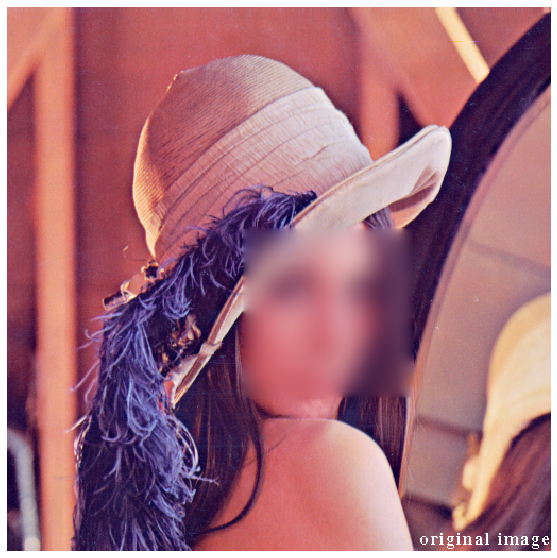

In [15]:
antall, image = anonym.blurFace(lena)
print(antall, "ansikt er registrert")   #teller opp antall ansikt funnet og skriver de ut    
iv.singleView(image)            #displayer bildet

4 ansikt er registrert


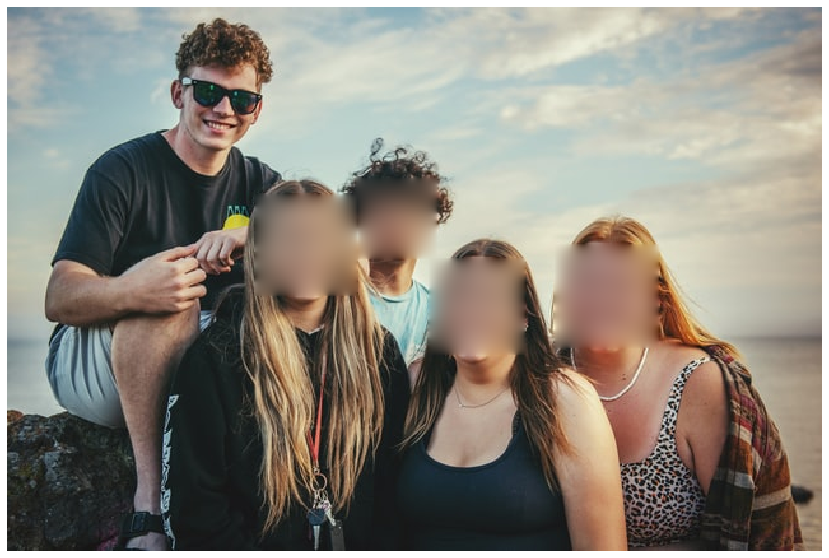

In [16]:
antall, image = anonym.blurFace(group, 1.2, 6)     
print(antall, "ansikt er registrert")                         #teller opp antall ansikt funnet og skriver de ut    
iv.singleView(image)              #displayer bildet

6 ansikt er registrert


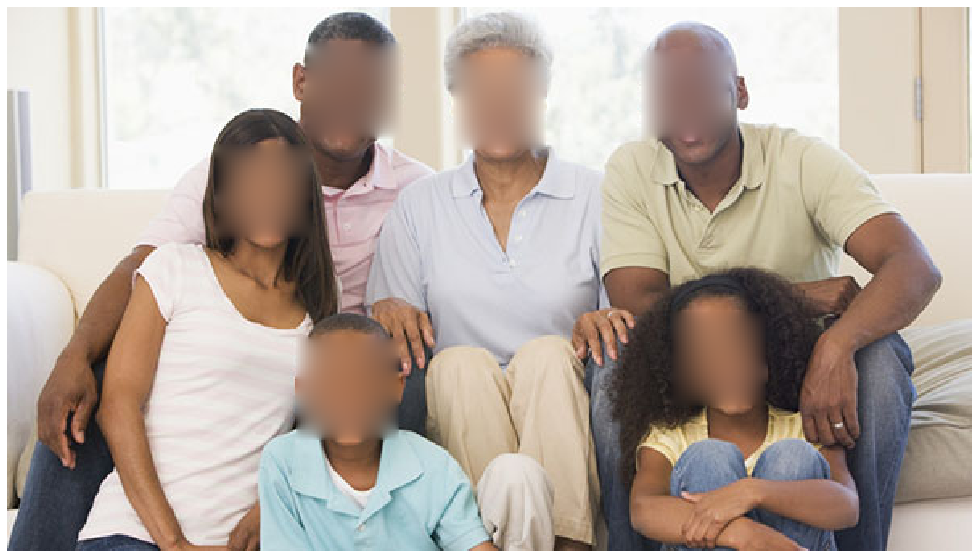

In [17]:
antall, image = anonym.blurFace(family, 1.09, 2)     
print(antall, "ansikt er registrert")                         #teller opp antall ansikt funnet og skriver de ut    
iv.singleView(image)              #displayer bildet